In [1]:
import numpy as np
import matplotlib.pyplot as plt    
import pandas as pd

Pupose of this notebook is to compare the errors made from assuming serial resistances against our continous model which takes consumption throughout the mesophyll into account. If we let conc. be so low that $C_c \rightarrow C^*$ then $g_m^* \rightarrow g_m$ directly. Lumbing $g_m$ into $g_{IAS}$ and a rest known as $g_{c}$, we can derive how much $g_m^{(*)}$ is reduced relative to $g_c$ for a given $g_{IAS}/g_c$ as:

* FvCB: $\frac{g_m}{g_c} = \frac{1}{1 + g_{c}/2g_{IAS}} = \frac{1}{1+\frac{1}{2}\tau^2}$

* US:   $\frac{g_m}{g_c} = \sqrt{g_{IAS}/g_c} \tanh \sqrt{g_c/g_{IAS}} = \frac{1}{\tau} \tanh \tau$

The difference between the $g_m$ and $g_m^*$ values rel. to $g_c$ is thus:

$\frac{g_m^*-g_m}{g_c} = \frac{1}{\tau} \tanh \tau - \frac{1}{1+\frac{1}{2}\tau^2}$

Where the factor 2 comes from the field definition of $g_{IAS} = 2D/L$

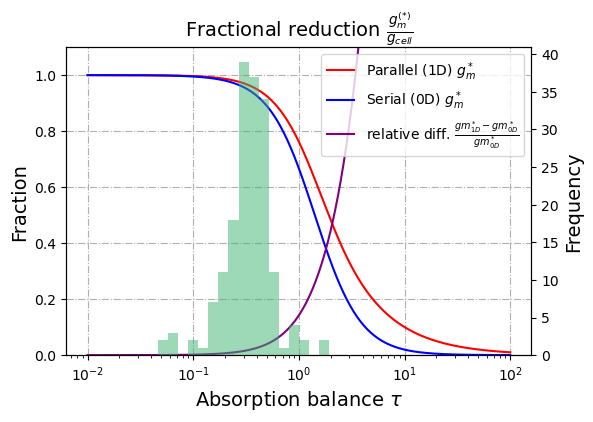

In [2]:
taus = np.exp(np.linspace(np.log(0.01), np.log(100), 500))
gmgc = 1/(1+0.5*(taus)**2)
gm_gc = 1/(taus)*np.tanh(taus)

# do a histogram of the tau distribution in our data
dfKnauer = pd.read_csv('data/Knauer2022_all_hypostomatous.csv', sep=';', decimal=',')
taus_data = dfKnauer['tau'].to_numpy()
xmin, xmax = 0.01, 100

fig, ax = plt.subplots(figsize=(6,4))


ax_ = ax.twinx()
ax_.hist(taus_data, bins=np.logspace(np.log10(xmin), np.log10(xmax), 43), color='mediumseagreen', alpha=0.5, zorder=-1)
ax_.set_ylabel('Frequency', fontsize=14)

ax.plot(taus, gm_gc, 'r-', label=r'Parallel (1D) $g_m^*$', zorder=3)
ax.plot(taus, gmgc, 'b', label=r'Serial (0D) $g_m^*$', zorder=3)
ax.plot(taus, (gm_gc-gmgc)/gmgc, color='purple', linestyle='-', label=r'relative diff. $\frac{gm^*_{1D} - gm^*_{0D}}{gm^*_{0D}}$', zorder=3)
ax.set_xscale('log')
ax.set_ylim(0, 1.1)
ax.set_xlabel(r'Absorption balance $\tau$', fontsize=14)
ax.set_ylabel(r'Fraction', fontsize=14)
ax.set_title(r'Fractional reduction $\frac{g_m^{(*)}}{g_{cell}}$', fontsize=14)
ax.grid(linestyle='-.')
ax.legend(loc='upper right')
plt.show()

In [19]:
rel_error = (gm_gc-gmgc)/gmgc

print(taus_data.max())

print(taus[rel_error > 0.50][0])
print(f'Fraction with a relative error less than X% is: {100 - 100*np.sum(taus_data > taus[rel_error > 0.50][0])/len(taus_data):.1f} %')

print("______________")
print(f'Relative error larger than 1 % for tau > {taus[rel_error > 0.01][0]:.3f}')
print(f'Relative error larger than 2 % for tau > {taus[rel_error > 0.02][0]:.3f}')
print(f'Relative error larger than 5% for tau > {taus[rel_error > 0.05][0]:.3f}')
print(f'Relative error larger than 10% for tau > {taus[rel_error > 0.10][0]:.3f}')
print(f'For the most extreme point at tau = {taus_data.max():.3f}, the relative error is 33 %')  

print(f'Fraction with a relative error larger than 1% is: {100*np.sum(taus_data > 0.248)/len(taus_data):.1f} %')
print(f'Fraction with a relative error larger than 2% is: {100*np.sum(taus_data > 0.352)/len(taus_data):.1f} %')
print(f'Fraction with a relative error larger than 5% is: {100*np.sum(taus_data > 0.570)/len(taus_data):.1f} %')
print(f'Fraction with a relative error larger than 10% is: {100*np.sum(taus_data > 0.824)/len(taus_data):.1f} %')

1.6541033515171124
2.1911966875781514
Fraction with a relative error less than X% is: 100.0 %
______________
Relative error larger than 1 % for tau > 0.248
Relative error larger than 2 % for tau > 0.352
Relative error larger than 5% for tau > 0.570
Relative error larger than 10% for tau > 0.824
For the most extreme point at tau = 1.654, the relative error is 33 %
Fraction with a relative error larger than 1% is: 80.5 %
Fraction with a relative error larger than 2% is: 50.6 %
Fraction with a relative error larger than 5% is: 6.9 %
Fraction with a relative error larger than 10% is: 4.6 %
